In [121]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform

In [3]:
def findfile(Energy, radius):

    filename = '../coeff/' + Energy + 'MeV/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    mean = np.array(h.root.mean)[:]
    expect = np.array(h.root.expect)[:]
    h.close()
    h1 = h5py.File(filename,'r')
    rate = np.array(h1['rate'])
    h1.close()
    return coeff, mean, expect, rate

no such file -0.65
no such file -0.64
no such file -0.63
no such file -0.62
no such file -0.61
no such file +0.61
no such file +0.62
no such file +0.63
no such file +0.64
no such file +0.65


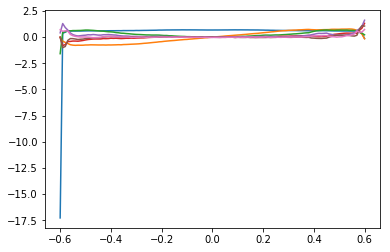

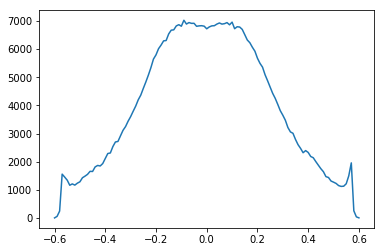

In [4]:
Energy = ['0.8','1','1.2','1.5','1.8','2']
coeff_total = np.zeros((0,7))
mean_total = np.zeros((0,30))
expect_total = np.zeros((0,30))
rate_total = []
x_total = np.zeros((0,1))
for radius in np.arange(-0.65,0.66,0.01):
    str_r = '%+.2f' % radius
    # print(str_r)
    try:
        coeff, mean, expect, rate = findfile('0.8',str_r)

        coeff_total = np.vstack((coeff_total, coeff))
        mean_total = np.vstack((mean_total, mean))
        expect_total = np.vstack((expect_total, expect))
        rate_total = np.hstack((rate_total, rate))
        x_total = np.vstack((x_total, radius))
    except:
        print('no such file',str_r)
plt.figure(num = 1)
plt.plot(x_total, coeff_total)
plt.figure(num = 2)
plt.plot(x_total, rate_total)
plt.show()

no such file -0.65
no such file -0.64
no such file +0.64
no such file +0.65


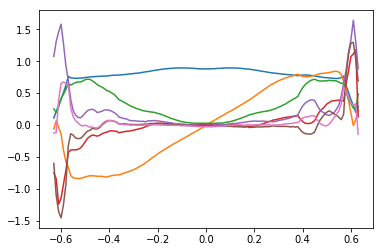

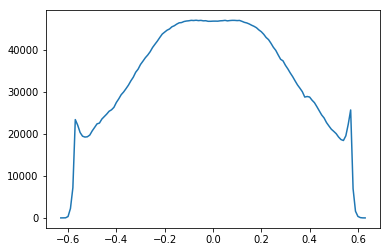

In [5]:
Energy = ['0.8','1','1.2','1.5','1.8','2']
coeff_total = np.zeros((0,7))
mean_total = np.zeros((0,30))
expect_total = np.zeros((0,30))
rate_total = []
x_total = np.zeros((0,1))
for radius in np.arange(-0.65,0.66,0.01):
    str_r = '%+.2f' % radius
    # print(str_r)
    try:
        coeff, mean, expect, rate = findfile('1',str_r)

        coeff_total = np.vstack((coeff_total, coeff))
        mean_total = np.vstack((mean_total, mean))
        expect_total = np.vstack((expect_total, expect))
        rate_total = np.hstack((rate_total, rate))
        x_total = np.vstack((x_total, radius))
    except:
        print('no such file',str_r)
plt.figure(num = 1)
plt.plot(x_total, coeff_total)
plt.figure(num = 2)
plt.plot(x_total, rate_total)
plt.show()

no such file -0.65
no such file -0.64
no such file -0.63
no such file -0.62
no such file -0.61
no such file +0.61
no such file +0.62
no such file +0.63
no such file +0.64
no such file +0.65
no such file -0.65
no such file -0.64
no such file +0.64
no such file +0.65
no such file -0.65
no such file -0.64
no such file +0.00
no such file +0.64
no such file +0.65
no such file -0.65
no such file -0.64
no such file +0.64
no such file +0.65
no such file -0.65
no such file -0.64
no such file +0.64
no such file +0.65
no such file -0.65
no such file -0.64
no such file +0.64
no such file +0.65


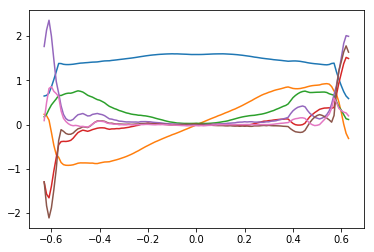

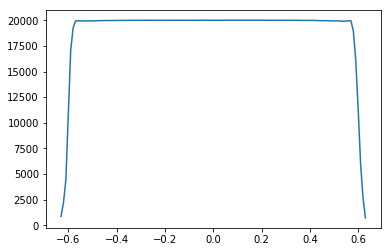

In [103]:
Energy = ['0.8','1','1.2','1.5','1.8','2']
data = []

for index, E in enumerate(Energy):
    coeff_total = np.zeros((0,7))
    mean_total = np.zeros((0,30))
    expect_total = np.zeros((0,30))
    rate_total = []
    x_total = np.zeros((0,1))
    for radius in np.arange(-0.65,0.66,0.01):
        str_r = '%+.2f' % radius
        # print(str_r)
        # print(index)
        try:
            coeff, mean, expect, rate = findfile(Energy[index],str_r)

            coeff_total = np.vstack((coeff_total, coeff))
            mean_total = np.vstack((mean_total, mean))
            expect_total = np.vstack((expect_total, expect))
            rate_total = np.hstack((rate_total, rate))
            x_total = np.vstack((x_total, radius))
            
        except:
            print('no such file',str_r)
            
    data.append((coeff_total, mean_total, expect_total, rate_total, x_total))
plt.figure(num = 1)
plt.plot(x_total, coeff_total)
plt.figure(num = 2)
plt.plot(x_total, rate_total)
plt.show()

/home/orv/gentoo/usr/lib64/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


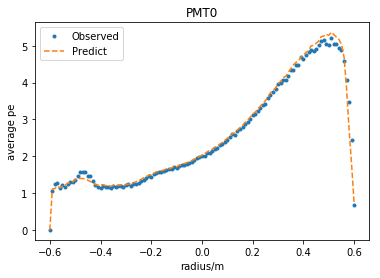

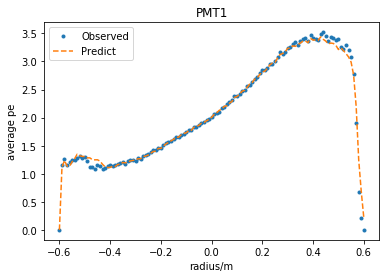

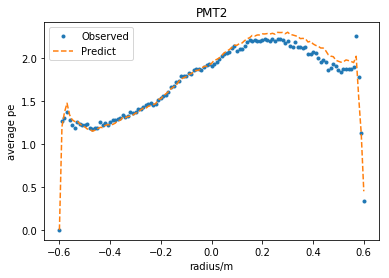

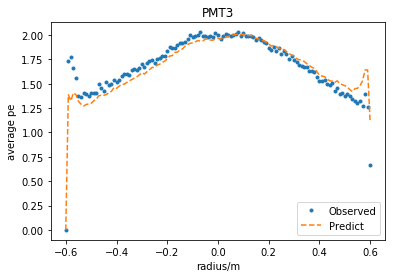

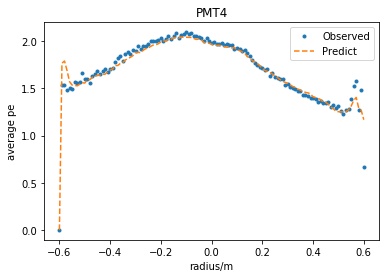

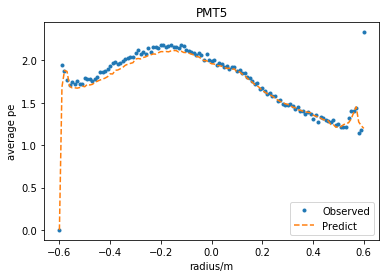

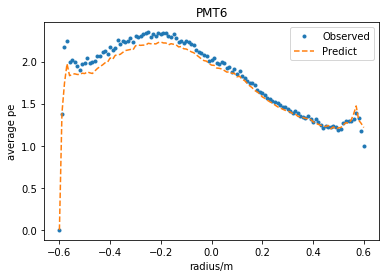

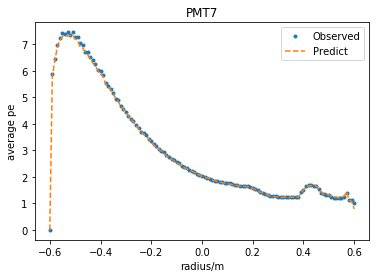

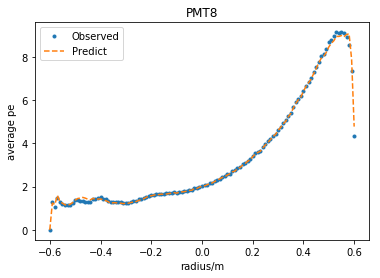

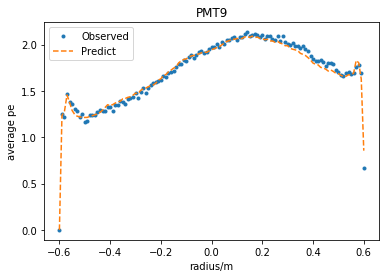

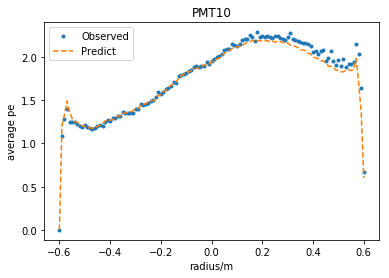

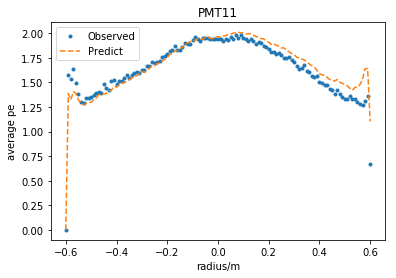

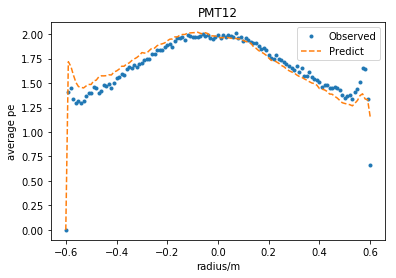

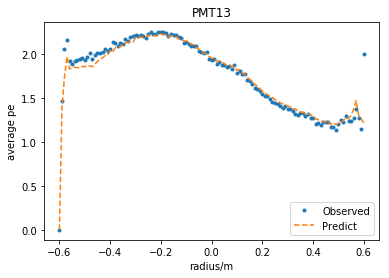

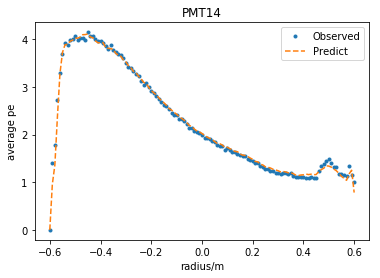

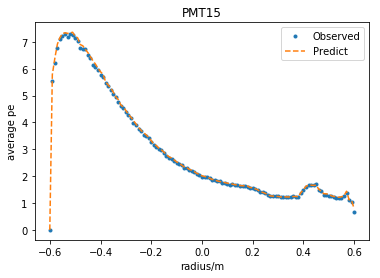

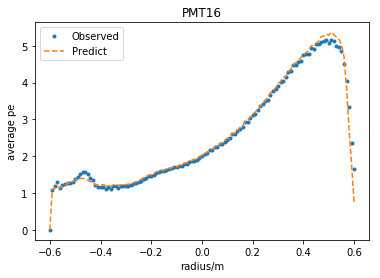

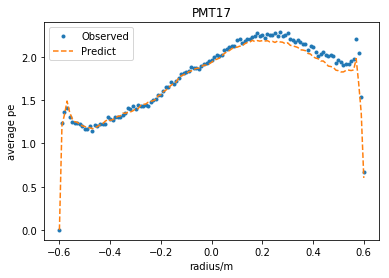

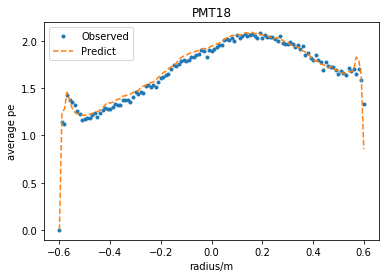

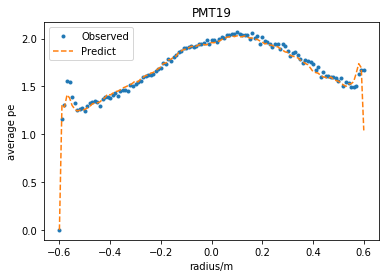

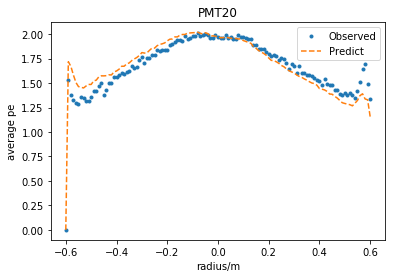

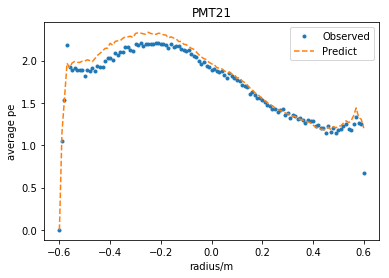

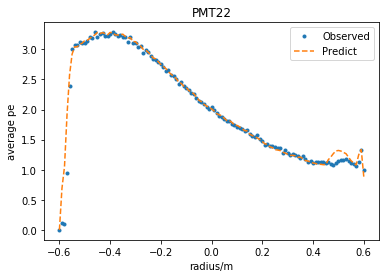

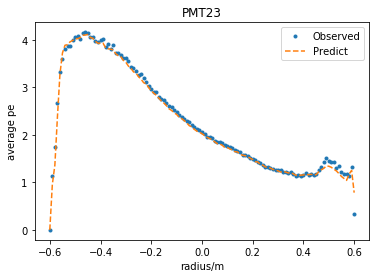

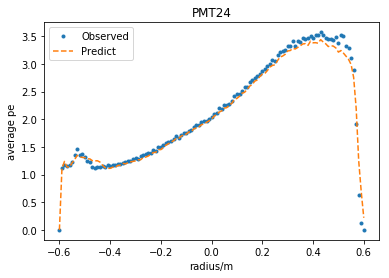

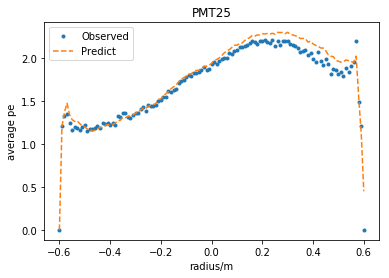

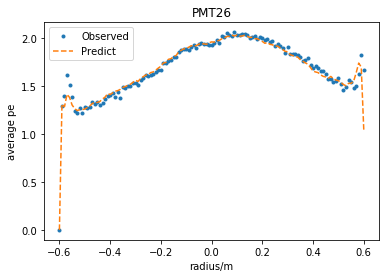

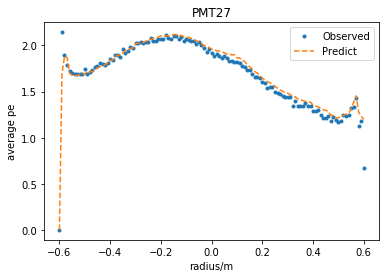

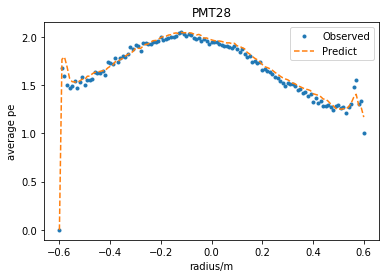

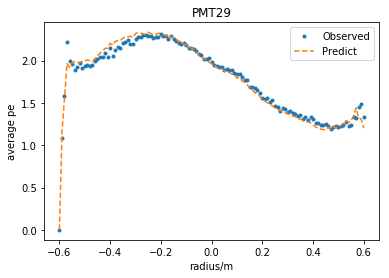

In [34]:
#print(data[0][-1].shape)
#print(data[0][1].shape)

for i in np.arange(30):
    plt.figure(num=i+1)
    plt.plot(data[0][-1], data[0][1][:,i],'.')
    plt.plot(data[0][-1], np.exp(data[0][2][:,i]),'--')
    plt.legend(['Observed', 'Predict'])
    plt.xlabel('radius/m')
    plt.ylabel('average pe')
    plt.title('PMT'+str(i))
plt.show()
#plt.plot(np.exp(data[0][2][1]),'--')

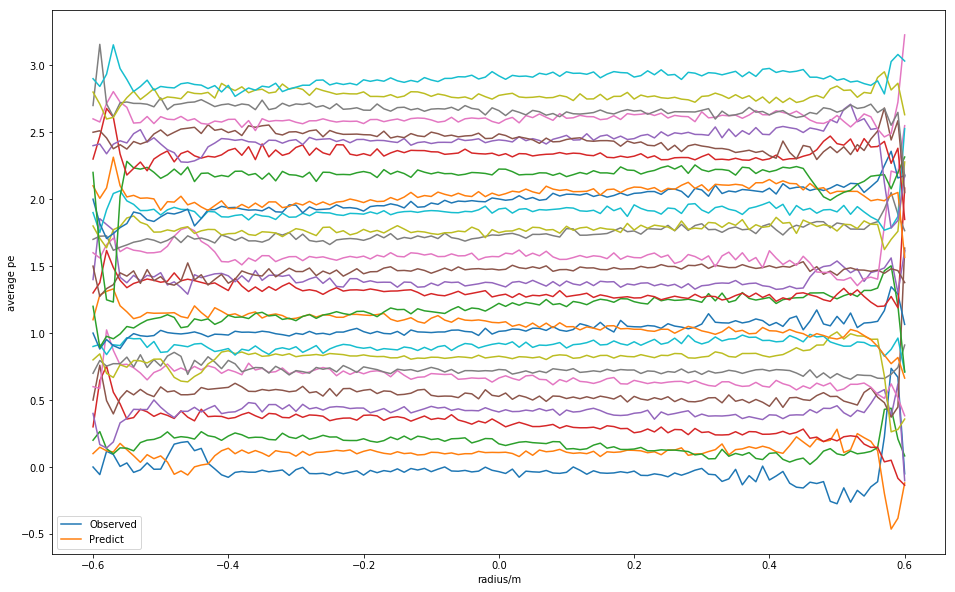

In [35]:
plt.figure(figsize=(16,10))
for i in np.arange(30):
    plt.plot(data[0][-1], data[0][1][:,i] - np.exp(data[0][2][:,i]) + i*0.1)
    plt.legend(['Observed', 'Predict'])
    plt.xlabel('radius/m')
    plt.ylabel('average pe')
plt.show()

In [66]:
print(data[4][2][abs(data[4][4]-0.3)<1e4])

IndexError: boolean index did not match indexed array along dimension 1; dimension is 30 but corresponding boolean dimension is 1

In [91]:
id1 = 98
id2 = 110
e = 0

print(np.sum(data[e][1][id1]), np.sum(data[e][4][np.int(id1)]))
print(data[e][1][id1])
print(np.sum(data[e][1][id2]), np.sum(data[e][4][np.int(id2)]))
print(data[e][1][id2])
#plt.plot(np.exp(data[0][1]))

60.550905953408105 0.3800000000000009
[4.47799827 3.37316652 2.05263158 1.61993097 1.41846419 1.39257981
 1.35202761 1.25496117 6.06557377 1.92924935 2.14754098 1.55565142
 1.54141501 1.31837791 1.11389129 1.21225194 4.55263158 2.08498706
 1.86885246 1.76747196 1.55565142 1.29853322 1.13589301 1.15012942
 3.46893874 2.03839517 1.78645384 1.33822261 1.38610871 1.29292494]
61.5440251572327 0.500000000000001
[5.01022013 3.39465409 1.86242138 1.375      1.31132075 1.24528302
 1.18160377 1.31918239 8.66509434 1.70283019 1.96698113 1.33569182
 1.34748428 1.20204403 1.47877358 1.25393082 5.0841195  1.96462264
 1.64779874 1.55896226 1.40015723 1.18238994 1.14544025 1.45518868
 3.3836478  1.81210692 1.57861635 1.16745283 1.29874214 1.21226415]


In [87]:
print(data[0][1])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.05357143 1.16071429 1.26785714 ... 2.14285714 1.67857143 1.08928571]
 [1.24180328 1.25819672 1.30737705 ... 1.89344262 1.59016393 1.58606557]
 ...
 [3.46245059 0.68379447 1.7826087  ... 1.12648221 1.3083004  1.45454545]
 [2.43589744 0.20512821 1.12820513 ... 1.17948718 1.33333333 1.48717949]
 [0.66666667 0.         0.33333333 ... 0.66666667 1.         1.33333333]]


In [92]:
def findfile1(Energy, radius):

    filename = '../coeff/' + Energy + '/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    mean = np.array(h.root.mean)[:]
    expect = np.array(h.root.expect)[:]
    h.close()
    h1 = h5py.File(filename,'r')
    rate = np.array(h1['rate'])
    h1.close()
    return coeff, mean, expect, rate

In [111]:
data1 = []

Energy = 'axis1'
coeff_total = np.zeros((0,7))
mean_total = np.zeros((0,30))
expect_total = np.zeros((0,30))
rate_total = []
x_total = np.zeros((0,1))
for radius in np.arange(-0.60,0.61,0.01):
    str_r = '%+.2f' % radius
    # print(str_r)
    # print(index)
    coeff, mean, expect, rate = findfile1(Energy,str_r)

    coeff_total = np.vstack((coeff_total, coeff))
    mean_total = np.vstack((mean_total, mean))
    expect_total = np.vstack((expect_total, expect))
    rate_total = np.hstack((rate_total, rate))
    x_total = np.vstack((x_total, radius))

data1.append((coeff_total, mean_total, expect_total, rate_total, x_total))

No handles with labels found to put in legend.


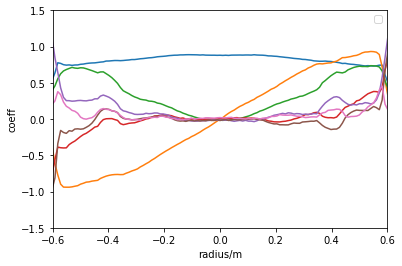

No handles with labels found to put in legend.


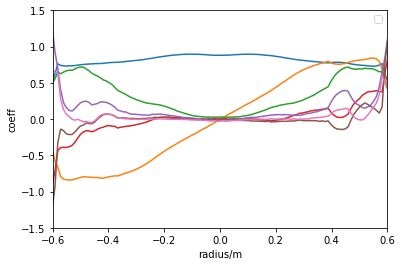

In [140]:
plt.plot(np.sqrt(data[0][-1]**2+data[0][-1]**2/25)*np.sign(data[0][-1]),data1[0][0])
plt.axis([-0.6,0.60,-1.5,1.5])
plt.xlabel('radius/m')
plt.ylabel('coeff')
plt.legend()
plt.show()

plt.plot(np.sqrt(data[1][-1]**2+data[1][-1]**2/25)*np.sign(data[1][-1]),data[1][0])
plt.axis([-0.6,0.60,-1.5,1.5])
plt.xlabel('radius/m')
plt.ylabel('coeff')
plt.legend()
plt.show()

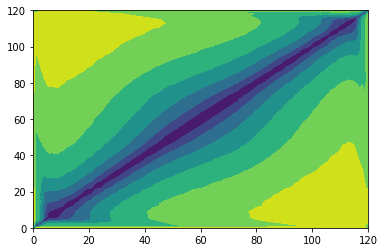

In [127]:
Y = pdist(data[e][1])
D = squareform(Y)
plt.contourf(np.log(D+1))